In [1]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# 設定 data_path
dir_data = './'

path = os.path.join(dir_data, 'diamond.csv')
print('Path of read in data: %s' % (path))
csv = pd.read_csv(path)
df = DataFrame(csv)
df

Path of read in data: ./diamond.csv


,GIA Number,Shape,Carat,Color,Clarity,Cut,Depth,Table,Price
0,6302897816,round,1.10,D,FL,EX,61.5,58.0,531247
1,6193605114,round,1.27,D,FL,EX,62.4,57.0,628587
2,5182557488,round,2.47,D,FL,EX,62.3,56.0,2606712
3,1315220514,round,0.30,D,IF,EX,61.9,57.0,22929
4,6305138197,round,0.31,D,IF,EX,61.7,57.0,23727
5,7302961760,round,0.31,D,IF,EX,61.2,57.0,23727
6,6305318234,round,0.33,D,IF,EX,62.4,56.0,25322
7,1305907144,round,0.34,D,IF,EX,62.4,57.0,26120
8,6311230567,round,0.34,D,IF,EX,61.8,58.0,26120
9,7311286294,round,0.37,D,IF,EX,61.8,59.0,29825


In [3]:
d_carat = df['Carat']
d_price = df['Price']

print(d_carat.describe())
print(d_price.describe())

count    641.000000
mean       0.598440
std        0.438259
min        0.300000
25%        0.330000
50%        0.500000
75%        0.620000
max        5.030000
Name: Carat, dtype: float64
count    6.410000e+02
mean     1.056648e+05
std      2.444191e+05
min      9.699000e+03
25%      1.654800e+04
50%      3.962100e+04
75%      7.662900e+04
max      2.606712e+06
Name: Price, dtype: float64


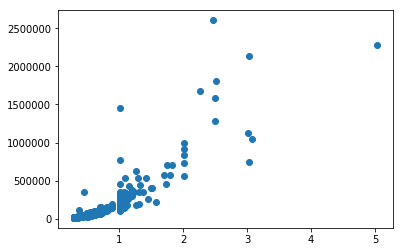

In [4]:
plt.scatter(d_carat, d_price)
plt.show()

round       583
heart        17
radiant      12
pear          9
oval          7
cushion       6
princess      5
marquise      1
emerald       1
Name: Shape, dtype: int64
['round', 'heart', 'radiant', 'pear', 'oval', 'cushion', 'princess', 'marquise', 'emerald']
(583, 1)


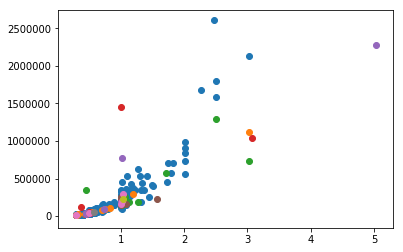

In [5]:
d_s = df['Shape']
print(d_s.value_counts())
print(d_s.value_counts().index.tolist())

for keys in d_s.value_counts().index.tolist():
    x_ = df.loc[df['Shape'] == keys, ['Carat']]
    y_ = df.loc[df['Shape'] == keys, ['Price']]
    plt.scatter(x_, y_)
    
d_x = df.loc[df['Shape'] == 'round', ['Carat']]
d_y = df.loc[df['Shape'] == 'round', ['Price']]
print(d_x.shape)

In [6]:
x_train = d_x.values
y_train = d_y.values/10000
print(x_train.shape)
print(x_train[:5])
print(y_train.shape)
print(y_train[:5])

(583, 1)
[[1.1 ]
 [1.27]
 [2.47]
 [0.3 ]
 [0.31]]
(583, 1)
[[ 53.1247]
 [ 62.8587]
 [260.6712]
 [  2.2929]
 [  2.3727]]


In [13]:
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

layer1 = tf.layers.dense(x, 10, tf.nn.relu)
layer2 = tf.layers.dense(layer1, 20, tf.nn.relu)

hypothesis = tf.layers.dense(layer2, 1)

loss = tf.losses.mean_squared_error(y, hypothesis)

train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

epoch: 0 loss:534.269470215


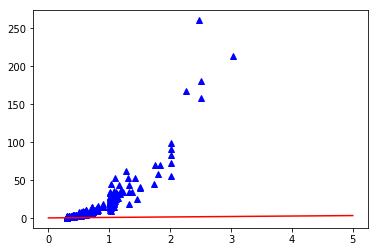

epoch: 100 loss:63.985023499


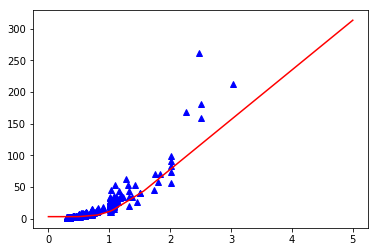

epoch: 200 loss:66.078315735


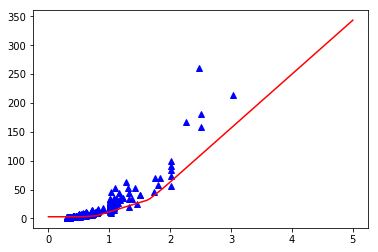

epoch: 300 loss:62.902217865


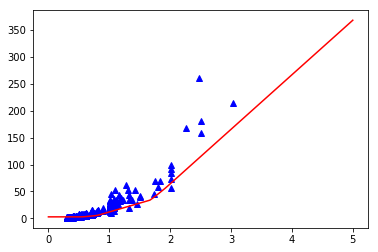

epoch: 400 loss:60.031764984


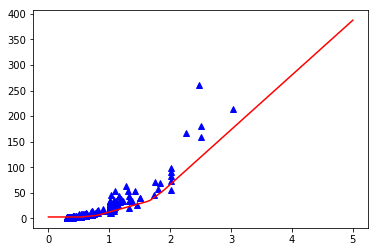

epoch: 500 loss:57.495475769


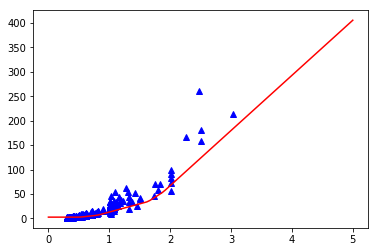

epoch: 600 loss:53.924896240


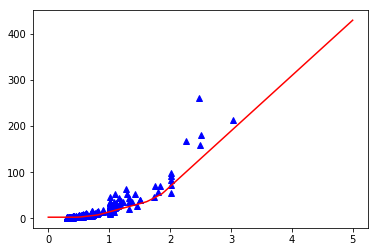

epoch: 700 loss:50.394706726


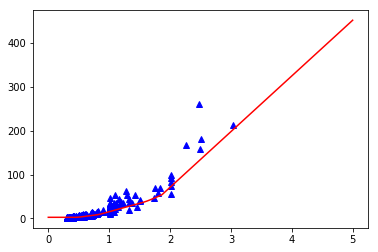

epoch: 800 loss:46.824668884


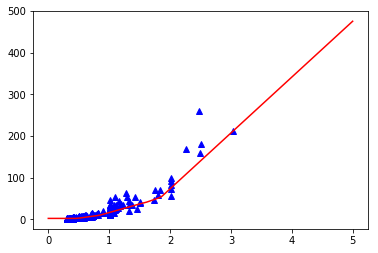

epoch: 900 loss:44.164016724


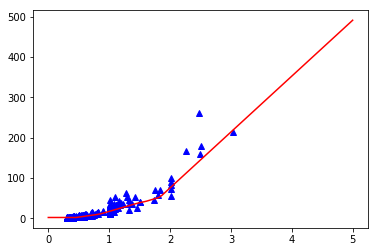

epoch: 1000 loss:42.573020935


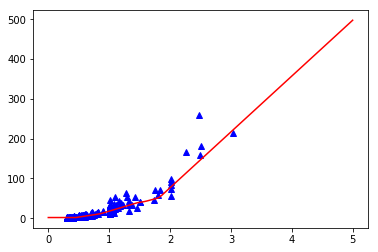

epoch: 1100 loss:41.365150452


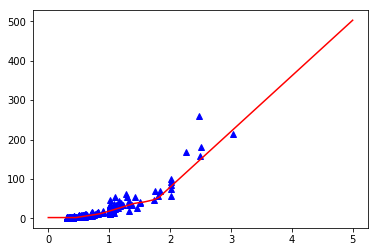

epoch: 1200 loss:36.975605011


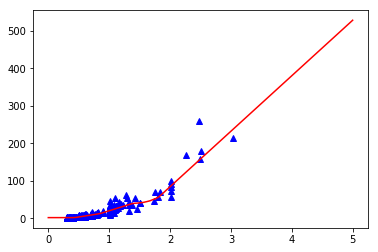

epoch: 1300 loss:37.105705261


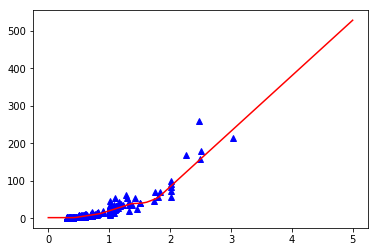

epoch: 1400 loss:36.422809601


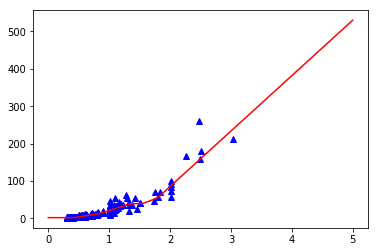

epoch: 1500 loss:39.018013000


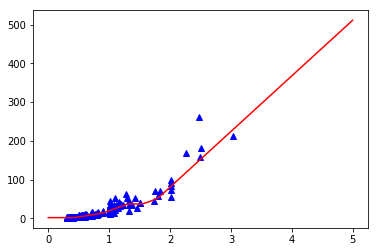

epoch: 1600 loss:37.529247284


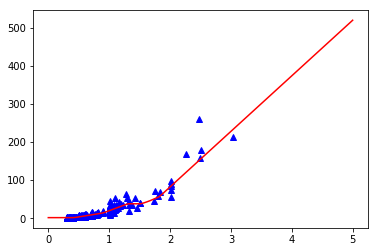

epoch: 1700 loss:37.698902130


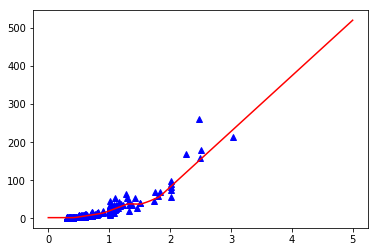

epoch: 1800 loss:35.271514893


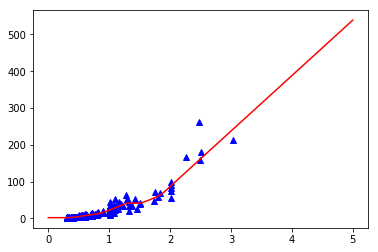

epoch: 1900 loss:37.704910278


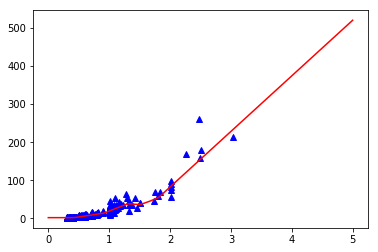

epoch: 2000 loss:35.284015656


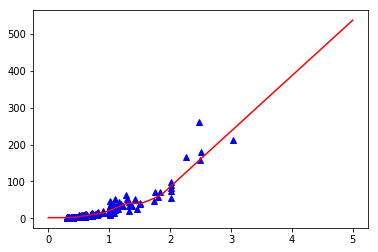

epoch: 2100 loss:36.443050385


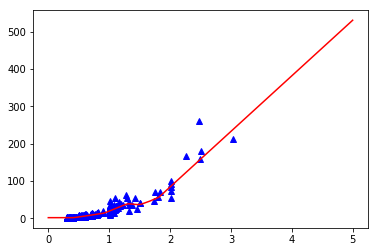

epoch: 2200 loss:36.400329590


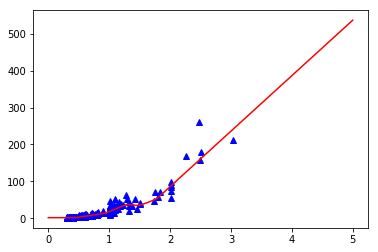

epoch: 2300 loss:36.274768829


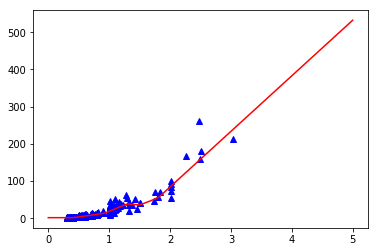

epoch: 2400 loss:36.313823700


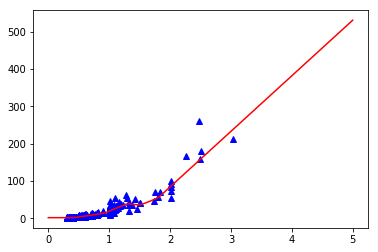

epoch: 2500 loss:33.853836060


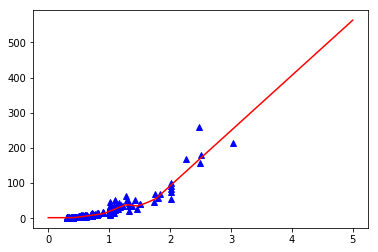

epoch: 2600 loss:39.601829529


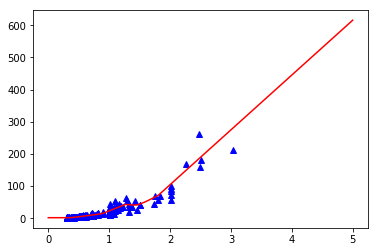

epoch: 2700 loss:36.953334808


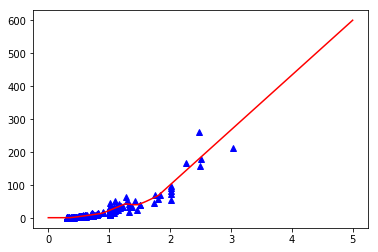

epoch: 2800 loss:36.414726257


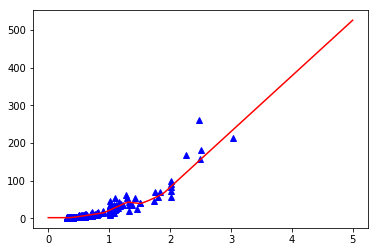

epoch: 2900 loss:36.152057648


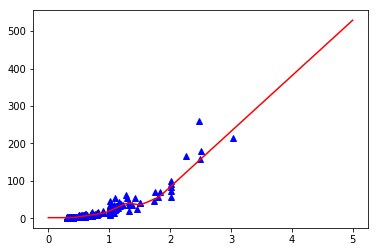

In [15]:
for epoch in range(3000):
    l_, _ = sess.run([loss, train], feed_dict={x:x_train, y:y_train})
    if epoch%100 == 0:
        print('epoch: %d'%epoch, 'loss:%.9f'%l_)
        x_draw = np.linspace(0, 5, 100)[:,np.newaxis]
        y_draw = sess.run(hypothesis, feed_dict={x:x_draw})
        plt.cla()
        plt.plot(x_train, y_train, "b^")
        plt.plot(x_draw, y_draw, "r-")
        plt.pause(0.1)
    